# 使用策略迭代求解Brock and Mirman 模型

### Table of Contents  <!-- omit in toc -->

- [Brock and Mirman with iid shocks (Policy Iteration)](#iid-shocks)
- [Results Analysis](#results)

### Brock and Mirman with iid shocks (Policy Iteration)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# 一些初始化超参
# Model Parameters
alpha = 0.4
beta = 0.9888

# Algorithm Parameters
T = 100 # periods to simulate
tolv = 1e-7 # tolerance
# steady state
k_ss = (1 / (beta*alpha))**(1 / (alpha - 1))
y_ss = k_ss ** alpha
c_ss = y_ss - k_ss

# print("k_ss=",k_ss)

# 制定初始化策略
lt = 2
theta = np.linspace(1 + 1.625/100, 1-1.625/100, num=lt)
# print(theta)

lk = 100
k_min = 0.96 * k_ss
k_max = 1.04 * k_ss
k = np.linspace(k_min, k_max, num=lk)
# print(k)

# 为每个k k'的状态组合计算效用函数
# 直接使用三维矩阵来存储结果
c = np.zeros((lk,lk,lt))
for t in range(lt):
    for i in range(lk):
        for j in range(lk):
            c[i, j, t] = theta[t] * k[i] ** alpha - k[j]
            if c[i, j, t] < 0:
                c [i, j ,t] = tolv
# print(c)
u = np.log(c)
p = np.array([0.5, 0.5])


def policy_evaluation(policy, old_V):
    cnt = 0
    while 1:
        new_V = np.zeros_like(old_V)
        for t in range(lt):
            for i in range(lk):
                # 这行代码其实是Value Iteration 和 Policy Iteration的主要区别
                new_V[i,t] = u[i, policy[i,t], t] + beta * np.sum(p * old_V[policy[i, t], :])

        if np.linalg.norm(new_V-old_V) < tolv:
            break
        old_V = new_V
        cnt += 1
    print(f'Total {cnt} round for policy evaluation')
    return old_V # 因为是把old value function 更新为new value function了

def policy_improvement(old_V,policy):
    policy_new = np.zeros_like(policy)
    for t in range(lt):
        for i in range(lk):
            policy_new[i, t] = np.argmax(u[i,:,t] + beta * np.sum(p * old_V, axis=1))
    return policy_new

# 策略迭代循环
def policy_iteration():
    # 下面进入策略迭代环节
    cnt = 0
    policy = np.zeros((lk, lt), dtype=int)
    old_V = np.zeros((lk ,lt))
    print("-----Beginning for Policy Iteration----")
    while 1:
        print(f'\nRound {cnt}:')
        old_V = policy_evaluation(policy, old_V)
        policy_new = policy_improvement(old_V,policy)
        if np.linalg.norm(policy_new - policy) < tolv:
            break
        policy = policy_new
        cnt += 1
    print("-----Ending for Policy Iteration----")
    print(f'\n\nTotal {cnt} round for Policy Iteration')
    return policy

# Results

optim_policy = policy_iteration()

print('Final optimal Policy')
print(optim_policy)
print('**' * 60)


-----Beginning for Policy Iteration----

Round 0:
Total 1677 round for policy evaluation

Round 1:
Total 965 round for policy evaluation

Round 2:
Total 833 round for policy evaluation

Round 3:
Total 457 round for policy evaluation

Round 4:
Total 302 round for policy evaluation

Round 5:
Total 157 round for policy evaluation

Round 6:
Total 54 round for policy evaluation

Round 7:
Total 5 round for policy evaluation
-----Ending for Policy Iteration----


Total 7 round for Policy Iteration
Final optimal Policy
[[49 10]
 [50 10]
 [50 11]
 [51 11]
 [51 11]
 [51 12]
 [52 12]
 [52 13]
 [53 13]
 [53 13]
 [53 14]
 [54 14]
 [54 14]
 [55 15]
 [55 15]
 [55 16]
 [56 16]
 [56 16]
 [57 17]
 [57 17]
 [58 18]
 [58 18]
 [58 18]
 [59 19]
 [59 19]
 [60 20]
 [60 20]
 [60 21]
 [61 21]
 [61 21]
 [62 22]
 [62 22]
 [62 23]
 [63 23]
 [63 23]
 [64 24]
 [64 24]
 [65 24]
 [65 25]
 [65 25]
 [66 26]
 [66 26]
 [67 26]
 [67 27]
 [67 27]
 [68 28]
 [68 28]
 [69 28]
 [69 29]
 [69 29]
 [70 30]
 [70 30]
 [71 30]
 [71 3

In [5]:
polk = k[optim_policy]
print(polk)

[[0.21302892 0.20631257]
 [0.21320114 0.20631257]
 [0.21320114 0.20648479]
 [0.21337335 0.20648479]
 [0.21337335 0.20648479]
 [0.21337335 0.206657  ]
 [0.21354557 0.206657  ]
 [0.21354557 0.20682921]
 [0.21371778 0.20682921]
 [0.21371778 0.20682921]
 [0.21371778 0.20700143]
 [0.21388999 0.20700143]
 [0.21388999 0.20700143]
 [0.21406221 0.20717364]
 [0.21406221 0.20717364]
 [0.21406221 0.20734586]
 [0.21423442 0.20734586]
 [0.21423442 0.20734586]
 [0.21440664 0.20751807]
 [0.21440664 0.20751807]
 [0.21457885 0.20769028]
 [0.21457885 0.20769028]
 [0.21457885 0.20769028]
 [0.21475107 0.2078625 ]
 [0.21475107 0.2078625 ]
 [0.21492328 0.20803471]
 [0.21492328 0.20803471]
 [0.21492328 0.20820693]
 [0.21509549 0.20820693]
 [0.21509549 0.20820693]
 [0.21526771 0.20837914]
 [0.21526771 0.20837914]
 [0.21526771 0.20855136]
 [0.21543992 0.20855136]
 [0.21543992 0.20855136]
 [0.21561214 0.20872357]
 [0.21561214 0.20872357]
 [0.21578435 0.20872357]
 [0.21578435 0.20889578]
 [0.21578435 0.20889578]


Text(0.5, 1.0, 'Simulation of all variables')

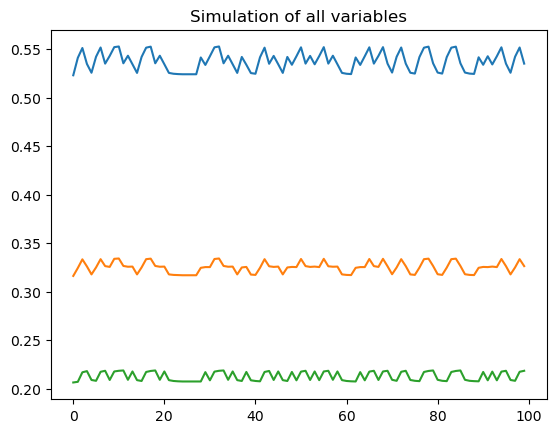

In [6]:
# Simulating the model
indk = 1
shock = 1
kopt = np.zeros(T+1)
sho = np.zeros(T)
output = np.zeros(T)
cons = np.zeros(T)

kopt[0] = polk[indk,shock]

for i in range(T):
    indk = optim_policy[indk,shock]
    sho[i] = theta[shock]
    kopt[i+1] = polk[indk,shock]
    output[i] = theta[shock] * kopt[i] ** alpha
    cons[i] = output[i]-kopt[i+1]
    shock = np.random.randint(0,2)
plt.plot(range(T), output)
plt.plot(range(T), cons)
plt.plot(range(T), kopt[:T])
plt.title("Simulation of all variables")

### Results Analysis
1. **结果比较**：


Value Iteration 和 Policy Iteration 均可以有效的解决有限离散马尔可夫决策问题（需知道概率转移矩阵和环境奖励，即环境可知）对于Brock and Mirman with iid shocks , 均可以解出最优策略，收敛点一致


2. **效率比较**:



Value Iteration 利用贝尔曼最优方程进行求解,迭代进行状态价值函数的更新,而后反解出最优策略。 通常来说效率更高，求解速度也更快


Policy Iteration 利用贝尔曼期望方程求解，分为策略评估和策略提升，对于每个固定策略，会进行迭代评估价值函数直至该状态下状态价值函数收敛，而后根据状态价值函数进行策略提升，更新旧策略
但策略迭代中的策略评估需要进行很多轮才能收敛到某一策略的状态函数，这需要很大的计算量，尤其是在状态和动作空间比较大的情况下，因此策略迭代的算法通常来说也较为耗时（状态和动作空间比较大时）



3. **Attention**:


需要注意的是，如果奖励函数和状态转移函数不可知，此时Policy Iteration 和 Value Iteration 均会失效，只能通过和环境交互来进行采样,即无模型强化学习(Model-Free RL)